In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
import os

bs = 32

np.random.seed(2)

In [2]:
path = os.path.abspath(os.getcwd())
path_img = path+'\\images'

def identifier(s):
    s = str(s)
    return s[57:60]

In [3]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/Preston/Documents/Data Mining 2/Lesson 1/images/cat.0.jpg'),
 WindowsPath('C:/Users/Preston/Documents/Data Mining 2/Lesson 1/images/cat.1.jpg'),
 WindowsPath('C:/Users/Preston/Documents/Data Mining 2/Lesson 1/images/cat.10.jpg'),
 WindowsPath('C:/Users/Preston/Documents/Data Mining 2/Lesson 1/images/cat.100.jpg'),
 WindowsPath('C:/Users/Preston/Documents/Data Mining 2/Lesson 1/images/cat.1000.jpg')]

In [4]:
data = ImageDataBunch.from_name_func(path_img, fnames, identifier, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

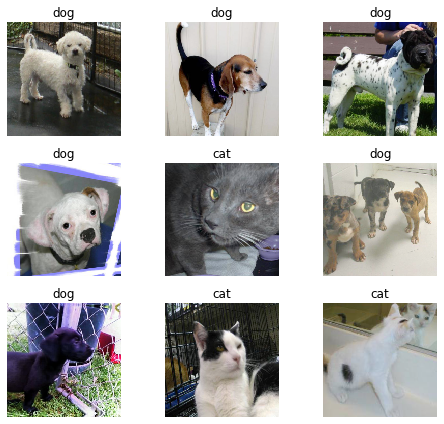

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.089352,0.042357,0.013800,03:33
1,0.059287,0.033509,0.010400,03:19
2,0.043034,0.029303,0.009200,03:20
3,0.041536,0.025056,0.007200,03:16


In [9]:
learn.save('cat_vs_dog_model')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

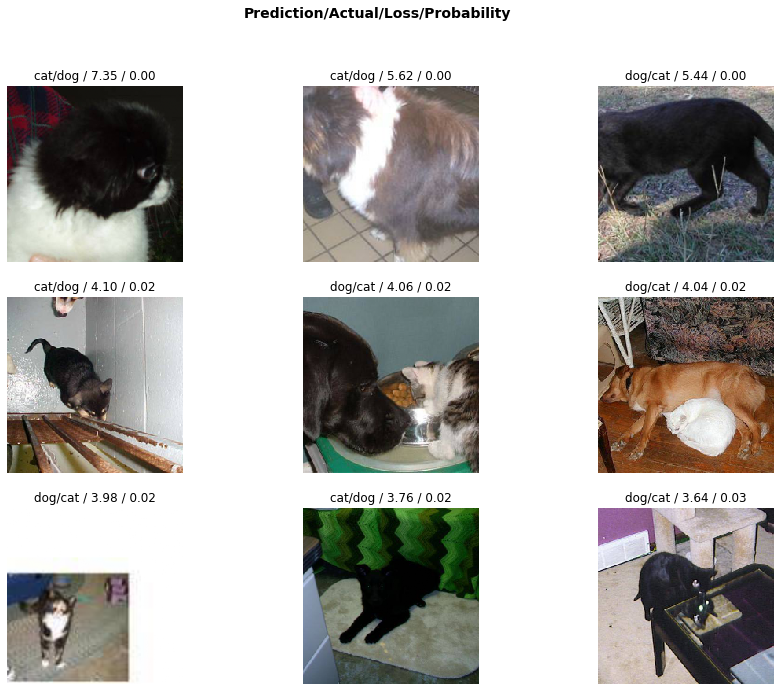

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

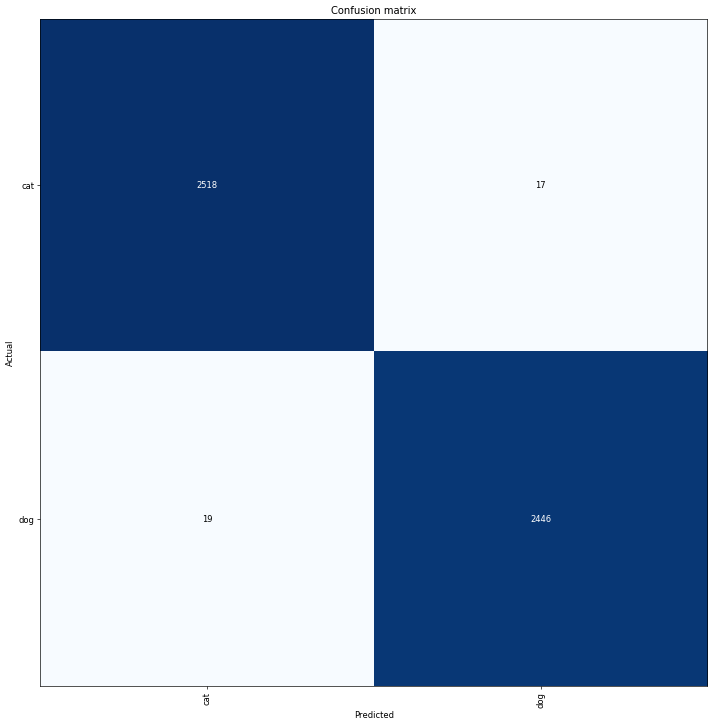

In [12]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)